In [18]:
import pandas as pd
import seaborn as sns
from glob import glob
from matplotlib.font_manager import fontManager, FontProperties

path = "/usr/share/fonts/opentype/linux-libertine/LinBiolinum_R.otf"
fontManager.addfont(path)
sns.set_theme(style="ticks", font=FontProperties(fname=path).get_name(), font_scale=1.2)

In [26]:
data = pd.concat([pd.read_csv(data, names=[
    "Variant", "#Replica/Region", "#Client/Region", "#PutClient/Region", "Throughput", "Latency"
]) for data in glob('cops-*.txt')], ignore_index=True)
data["Put %"] = data["#PutClient/Region"] / 2 / data["#Client/Region"] * 100
data

,Variant,#Replica/Region,#Client/Region,#PutClient/Region,Throughput,Latency,Put %
0,Untrusted,1,100,60,66590.970,0.007596,30.0
1,Quorum,1,100,100,10346.603,0.049338,50.0
2,Untrusted,1,100,40,90839.900,0.005564,20.0
3,Untrusted,1,100,4,214341.830,0.002333,2.0
4,Untrusted,1,100,1,246828.300,0.002026,0.5
5,Quorum,1,100,2,133823.080,0.003782,1.0
6,Untrusted,1,100,80,54223.188,0.009375,40.0
7,Quorum,1,100,1,168428.520,0.003195,0.5
8,Untrusted,1,100,8,186468.660,0.002683,4.0
9,Quorum,1,100,4,122890.380,0.004179,2.0


/tmp/ipykernel_354825/2626778330.py:1: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(data=data,


[(0.0, 260000.0)]

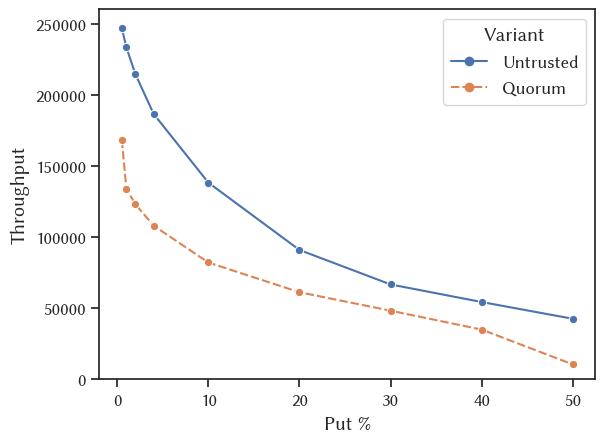

In [27]:
f = sns.lineplot(data=data,
    x="Put %", y="Throughput", hue="Variant", style="Variant", markers=['o'])
f.set(ylim=(0, 260000))